In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

##### В качестве моего "любимого" будем использовать Beta-распределение

In [3]:
# Задаем альфу и бетту случайными числами [0.0; 1.0)

a, b = np.random.random_sample((2))
print('a = %f' % a)
print ('b = %f' % b)

a = 0.529488
b = 0.049322


In [4]:
# Задаем формулу распределения

rv = sts.beta(a, b)

In [5]:
# Вычисляем тысячу случайных значений нашего распределения

beta_1000_samples = rv.rvs(size=1000)

In [6]:
# Подготовим данные для теоретической плотности распределения

theory_x = np.linspace(0., 1., 500)
theory_y = rv.pdf(theory_x) 

In [ ]:
# Рисуем гистограмму
plt.hist(beta_1000_samples, bins=30, normed=True, label='real')

# Рисуем график теории
plt.plot(theory_x, theory_y, label='theory')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

In [ ]:
# Рассчитаем мат. ожидание и дисперсию

M = a / (a + b)
D = a*b / (a + b )**2 / (a + b + 1)

print('M = %f' % M)
print('D = %f' % D)

In [ ]:
# Зададим формулу поиска выборочного среднего для объема выборки = n

get_avg = lambda n: np.sum(rv.rvs(size=n))/n

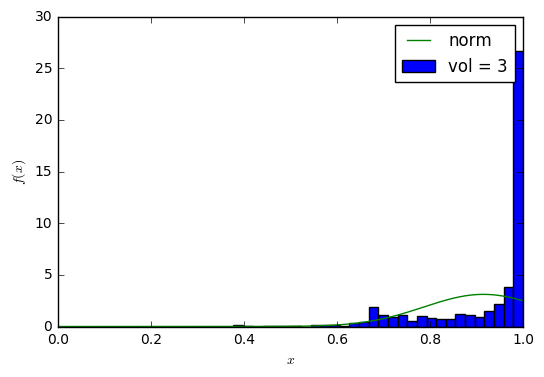

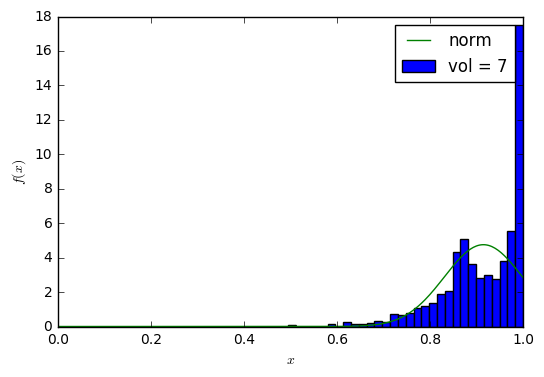

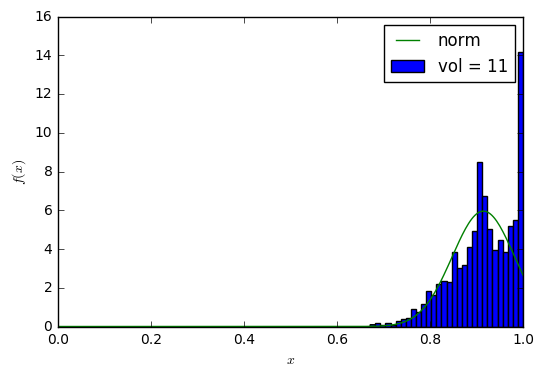

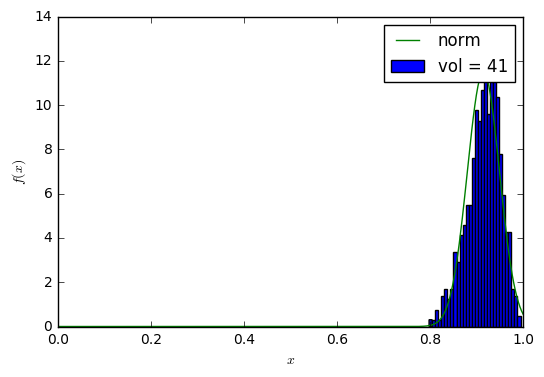

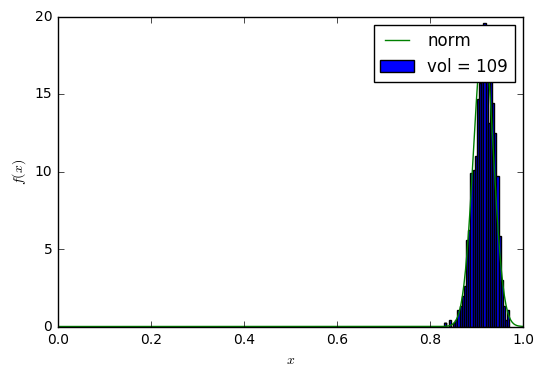

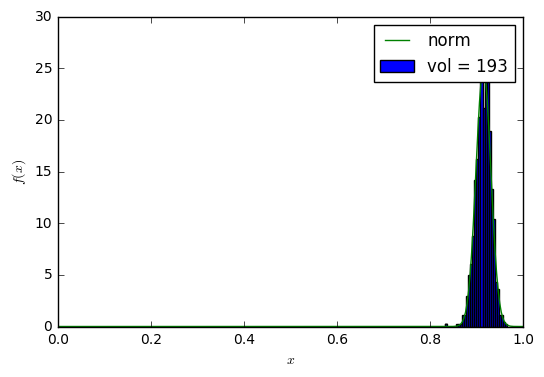

In [15]:
# Строим графики для разных объемов выборки

sample_volumes = [3, 7, 11, 41, 109, 193]

for sv in sample_volumes:
    # Массив из 1000 элементов с объемом выборки sv
    arr = np.array([get_avg(sv) for i in range(1000)])
    
    # Приближение по ЦПТ
    norm_rv = sts.norm(M, np.sqrt(D/sv))
    norm_x = np.linspace(0., 1., 300)
    norm_y = norm_rv.pdf(norm_x)
    
    plt.hist(arr, bins=30, normed=True, label='vol = ' + str(sv))
    plt.plot(norm_x, norm_y, label='norm')
    
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend()
    plt.show()   

#### Глубокомысленный вывод 
Очевидно, работает